In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [3]:
base = pd.read_csv('train.csv')
base

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
base = pd.read_csv('train.csv', parse_dates=['datetime'], index_col = 0)
base

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
base.drop(columns = ['season', 'holiday','workingday','weather','temp','atemp', 'humidity','windspeed','casual', 'registered'], axis = 1, inplace = True)
base

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [6]:
base = base.groupby(pd.Grouper(freq = 'D')).sum()
base

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


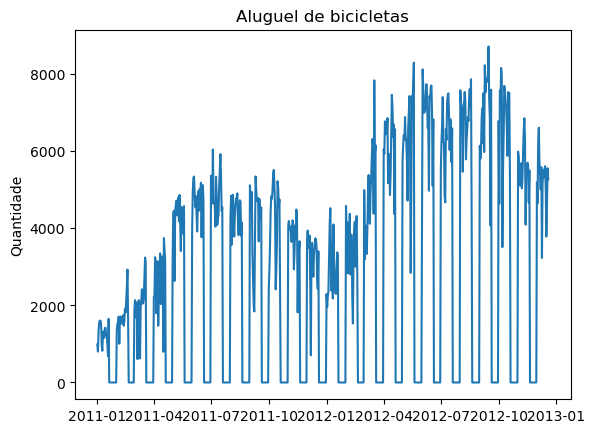

In [7]:
plt.plot(base['count'])
plt.ylabel('Quantidade')
plt.title('Aluguel de bicicletas');

In [8]:
import boto3
import sagemaker
from sagemaker import RandomCutForest

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [9]:
session = sagemaker.Session()
bucket = 'curso-aws-sagemaker-1736262933'
subpasta_dataset = 'datasets/bike/random-cut'
subpasta_modelo = 'modelos/bike/random-cut'
key = 'bike-random-cut'
s3_data = 's3://{}/{}/{}'.format(bucket, subpasta_dataset, key)
output_location = 's3://{}/{}'.format(bucket, subpasta_modelo)
role = sagemaker.get_execution_role()
boto3.Session().client('s3').head_bucket(Bucket = bucket)
print('Localização da base de dados: ', s3_data)
print('Localização do modelo: ', output_location)

Localização da base de dados:  s3://curso-aws-sagemaker-1736262933/datasets/bike/random-cut/bike-random-cut
Localização do modelo:  s3://curso-aws-sagemaker-1736262933/modelos/bike/random-cut


In [10]:
base['count'].to_numpy().reshape(-1,1).shape

(719, 1)

In [12]:
random_cut = RandomCutForest(role = role,
                             instance_count = 1,
                             instance_type = 'ml.m5.large',
                             data_location = s3_data,
                             output_path = output_location,
                             use_spot_instances = True,
                             max_run = 3600,
                             max_wait = 3600)
random_cut.fit(random_cut.record_set(base['count'].to_numpy().reshape(-1,1)))

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: randomcutforest-2025-01-09-14-37-08-084


2025-01-09 14:37:09 Starting - Starting the training job...
2025-01-09 14:37:24 Starting - Preparing the instances for training...
2025-01-09 14:37:51 Downloading - Downloading input data...
2025-01-09 14:38:32 Downloading - Downloading the training image.........
2025-01-09 14:40:14 Training - Training image download completed. Training in progress.
2025-01-09 14:40:14 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cons['type'] is 'ineq':
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:743: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(self.X_min) is not 0:
[01/09/20

In [13]:
random_cut_bikes = random_cut.deploy(initial_instance_count = 1, instance_type = 'ml.m5.large')

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: randomcutforest-2025-01-09-14-41-53-512
INFO:sagemaker:Creating endpoint-config with name randomcutforest-2025-01-09-14-41-53-512
INFO:sagemaker:Creating endpoint with name randomcutforest-2025-01-09-14-41-53-512


-------!

In [14]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
random_cut_bikes.serializer = CSVSerializer()
random_cut_bikes.deserializer = JSONDeserializer()

In [15]:
base_numpy = base['count'].to_numpy().reshape(-1,1)
base_numpy[0:5], base_numpy.shape

(array([[ 985],
        [ 801],
        [1349],
        [1562],
        [1600]]),
 (719, 1))

In [16]:
previsoes = random_cut_bikes.predict(base_numpy)
previsoes

{'scores': [{'score': 1.8427124136},
  {'score': 1.8779629803},
  {'score': 1.788018},
  {'score': 1.7600347491},
  {'score': 1.7583902968},
  {'score': 1.7580055918},
  {'score': 1.7645484732},
  {'score': 1.8462310874},
  {'score': 1.8655149327},
  {'score': 1.790242089},
  {'score': 1.8025840087},
  {'score': 1.8186494633},
  {'score': 1.7769692218},
  {'score': 1.7817405296},
  {'score': 1.8051349568},
  {'score': 1.811067636},
  {'score': 1.8388323286},
  {'score': 1.8821097267},
  {'score': 1.7556930815},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.4964759866},
  {'score': 1.7889037665},
  {'score': 1.7623445808},
  {'score': 1.7607798754},
  {'score': 1.7495587164},
  {'score': 1.8380334829},
  {'score': 1.7626248069

In [17]:
previsoes = [p['score'] for p in previsoes['scores']]

In [18]:
previsoes[0:5]

[1.8427124136, 1.8779629803, 1.788018, 1.7600347491, 1.7583902968]

In [19]:
base['score'] = pd.Series(previsoes, index = base.index)
base

,count,score
datetime,,
2011-01-01,985,1.842712
2011-01-02,801,1.877963
2011-01-03,1349,1.788018
2011-01-04,1562,1.760035
2011-01-05,1600,1.758390
...,...,...
2012-12-15,5047,1.658249
2012-12-16,3786,1.615881
2012-12-17,4585,1.597471


In [20]:
base.describe()

,count,score
count,719.000000,719.000000
mean,2900.522949,1.642962
std,2659.328686,0.147586
min,0.000000,1.496476
25%,0.000000,1.496476
50%,2935.000000,1.614152
75%,5027.500000,1.738556
max,8714.000000,2.171983


In [21]:
min(previsoes), max(previsoes), 1.4 * max(previsoes)

(1.4964759866, 2.1719825901, 3.0407756261399994)

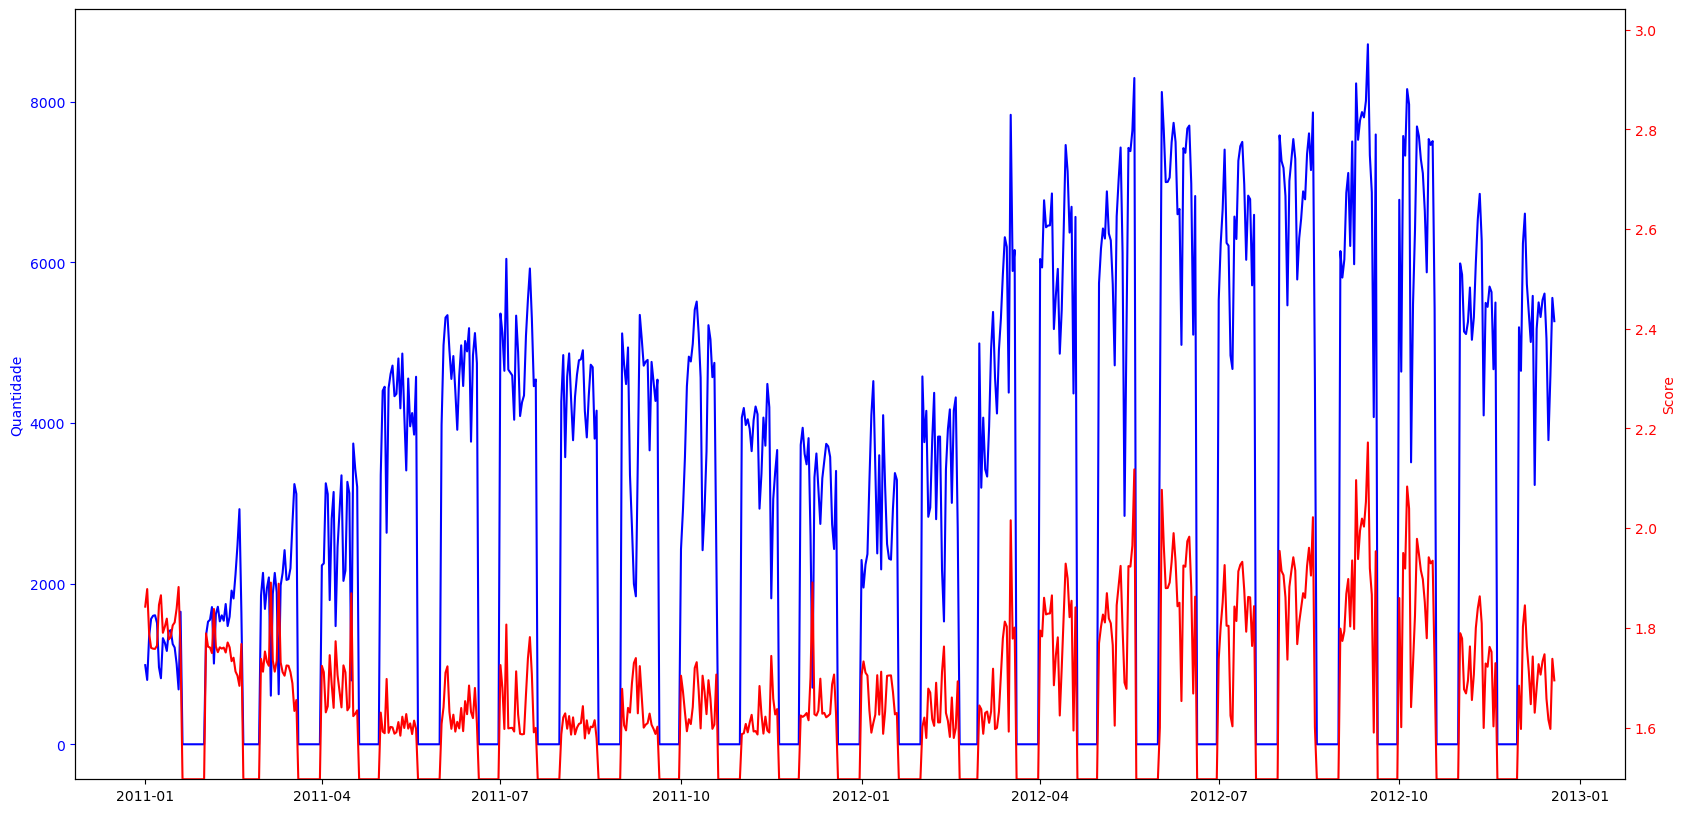

In [22]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax2 = ax1.twinx()

ax1.plot(base['count'], color = 'b')
ax2.plot(base['score'], color = 'r')

ax1.set_ylabel('Quantidade', color = 'b')
ax2.set_ylabel('Score', color = 'r')

ax1.tick_params('y', colors = 'b')
ax2.tick_params('y', colors = 'r')

ax2.set_ylim(min(previsoes), 1.4 * max(previsoes));

In [23]:
media_score = base['score'].mean()
media_score

1.642962491729346

In [24]:
desvio_padrao_score = base['score'].std()
desvio_padrao_score

0.1475863095074064

In [25]:
corte_score = media_score + 3 * desvio_padrao_score
corte_score

2.085721420251565

In [26]:
outliers = base[base['score'] > corte_score]
outliers

,count,score
datetime,,
2012-05-19,8294,2.118038
2012-09-09,8227,2.096449
2012-09-15,8714,2.171983


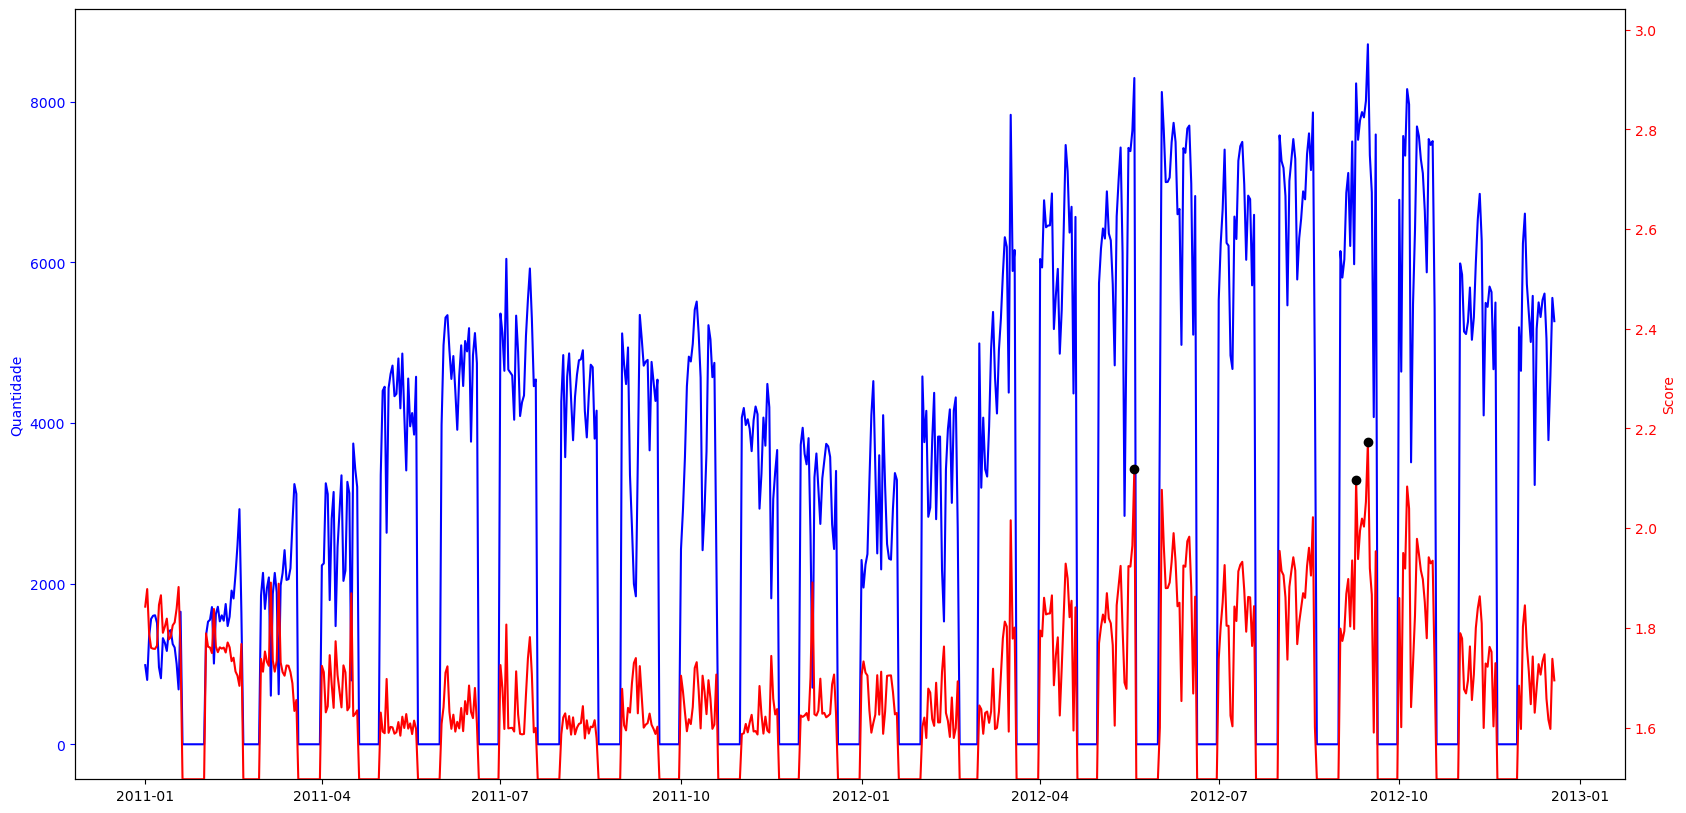

In [27]:
ax2.plot(outliers.index, outliers['score'], 'ko')
fig

In [28]:
import boto3

# Criar cliente do SageMaker
client = boto3.client('sagemaker', region_name='us-east-1')

# Listar os endpoints
response = client.list_endpoints()

# Exibir os endpoints
for endpoint in response['Endpoints']:
    print(endpoint['EndpointName'])

randomcutforest-2025-01-09-14-41-53-512


In [ ]:

import boto3

# Cliente SageMaker
sagemaker_client = boto3.client('sagemaker')

# Nome do endpoint a ser deletado
endpoint_name = "randomcutforest-2025-01-09-14-41-53-512"

# Deletar o endpoint
sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
print(f"Endpoint '{endpoint_name}' deletado com sucesso.")
